# Data Preprocessing

This notebook cleans the dataset and prepares it for feeding the machine learning model.

In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#  Mount data dtive for Google-Colab
# from google.colab import drive
# import nbformat
# from nbconvert import HTMLExporter
# drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_malicious = pd.read_csv('/content/drive/My Drive/Fontys/SUE/data/elastic_may2021_malicious_data.csv')
df_malicious.head(3)

,_source_flow_id,_source_flow_final,_source_source_ip,_source_destination_ip,_source_network_bytes,_source_network_transport,_source_@timestamp,_source_event_duration,_source_destination_port,_source_source_port,label
0,EAT/////AP//////CP8AAAEKauwfwKhUn/AjZuY,False,190.215.171.15,53.181.147.225,259047.0,tcp,2021-05-23T13:57:50.000Z,1320579731159,9200.0,58982.0,benign
1,EAT/////AP//////CP8AAAHAqFSfwKhUoGbm8CM,False,190.215.171.15,190.215.171.36,259047.0,tcp,2021-05-23T13:57:50.000Z,1320579679339,9200.0,58982.0,benign
2,EAT/////AP//////CP8AAAEKauwfwKhUn/AjBOY,False,190.215.171.15,53.181.147.225,200483.0,tcp,2021-05-23T13:57:50.000Z,1320002683772,9200.0,58884.0,benign


In [4]:
df_benign = pd.read_csv('/content/drive/My Drive/Fontys/SUE/data/elastic_may2021_benign_data.csv')
df_benign.head(3)

,_source_flow_id,_source_flow_final,_source_source_ip,_source_destination_ip,_source_network_bytes,_source_network_transport,_source_@timestamp,_source_event_duration,_source_destination_port,_source_source_port,label
0,EAT/////AP//////CP8AAAEKbmGBwKhUnvAjsoo,False,190.215.171.14,53.179.129.5,950151,tcp,2021-05-20T16:06:50.195Z,5098334271960,9200.0,35506.0,benign
1,EAT/////AP//////CP8AAAHAqFSdwKhUnvAjsoo,False,190.215.171.14,190.215.171.13,950151,tcp,2021-05-20T16:06:50.195Z,5098334225330,9200.0,35506.0,benign
2,EAT/////AP//////CP8AAAEKbmGBwKhUnvAjqIo,False,190.215.171.14,53.179.129.5,5432972,tcp,2021-05-20T16:06:50.195Z,5098333570147,9200.0,35496.0,benign


In [5]:
df_february = pd.read_csv('/content/drive/My Drive/Fontys/SUE/data/elastic_february2022_data.csv')
df_february.head(3)

,_source_flow_id,_source_flow_final,_source_source_ip,_source_destination_ip,_source_network_bytes,_source_network_transport,_source_@timestamp,_source_event_duration,_source_destination_port,_source_source_port,label
0,EAD/////AP////////8AAAGsEAILrBACDA,False,240.16.203.232,240.16.203.236,72096053,NaN,2022-02-25T12:20:00.007Z,41753051589,NaN,NaN,benign
1,EAD/////AP////////8AAAGsEAIKrBACDA,False,240.16.203.236,240.16.203.233,913734,NaN,2022-02-25T12:20:00.007Z,35268442180,NaN,NaN,benign
2,EAT/////AP//////CP8AAAHAqFSDwKj3AAEIbQI,False,190.215.171.30,190.215.9.27,30684984,tcp,2022-02-25T12:20:00.007Z,41662926223,621.0,2049.0,benign


In [6]:
df_may = pd.read_csv('/content/drive/My Drive/Fontys/SUE/data/elastic_may2022_data.csv', sep=';')
df_may.head(3)

,_source_flow_id,_source_flow_final,_source_source_ip,_source_destination_ip,_source_network_bytes,_source_network_transport,_source_@timestamp,_source_event_duration,_source_destination_port,_source_source_port,_source_network_packets,label
0,EAT/////AP//////CP8AAAEKAAIPwKj3BYUDAQg,False,95.180.199.26,244.121.253.144,476424919,tcp,2022-05-04T14:37:10.271Z,509449510838,901.0,2049.0,163635,benign
1,EAT/////AP//////CP8AAAHAqFSXwKj3Fk6XVCQ,False,95.180.199.6,95.180.91.120,158570149,tcp,2022-05-04T14:37:10.271Z,509446479326,38734.0,9300.0,15604,benign
2,EAT/////AP//////CP8AAAHAqFSAwKj3BYYDAQg,False,95.180.91.98,95.180.199.26,855437751,tcp,2022-05-04T14:37:10.271Z,509452160653,2049.0,902.0,334165,benign


First we check which columns have missing values.

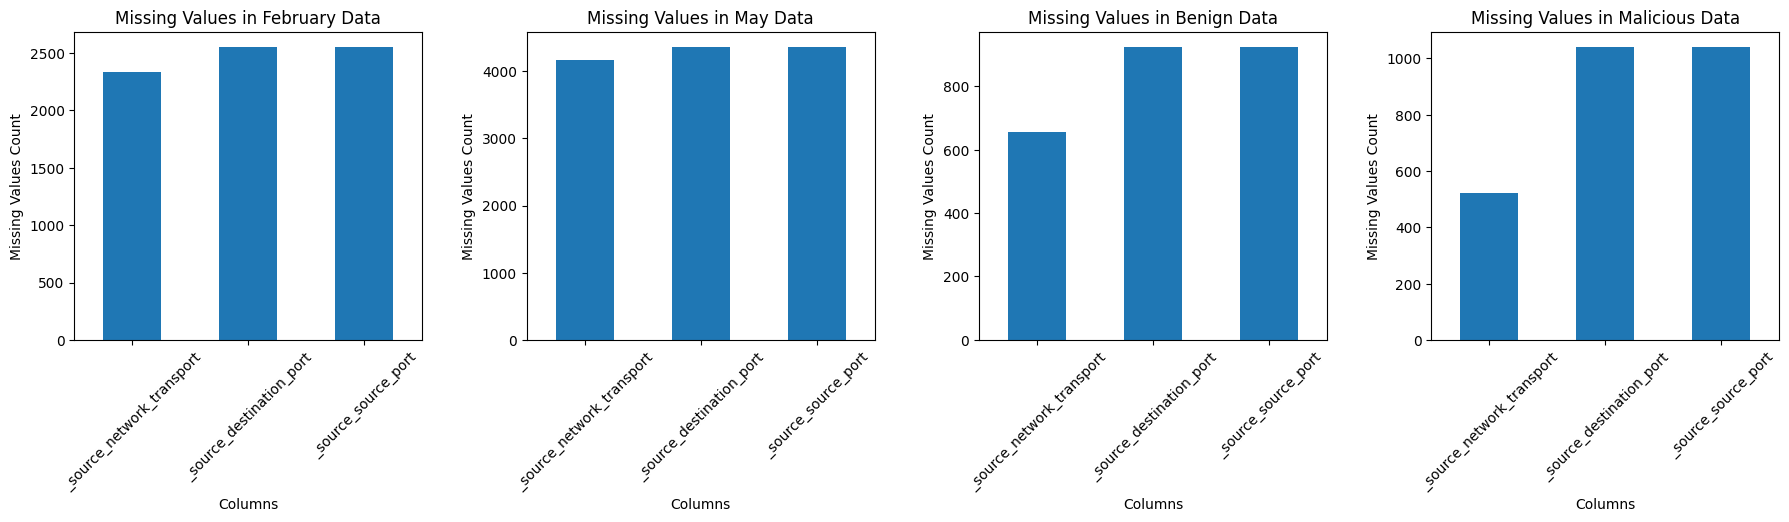

In [7]:
missing_values_february = df_february.isnull().sum()[df_february.isnull().sum() > 0]
missing_values_may = df_may.isnull().sum()[df_may.isnull().sum() > 0]
missing_values_benign = df_benign.isnull().sum()[df_benign.isnull().sum() > 0]
missing_values_malicious = df_malicious.isnull().sum()[df_malicious.isnull().sum() > 0]

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 4, figsize=(22, 4))

# Create bar plots for each DataFrame
for i, (missing_values, title) in enumerate(zip(
        [missing_values_february, missing_values_may, missing_values_benign, missing_values_malicious],
        ['February Data', 'May Data', 'Benign Data', 'Malicious Data'])):
    missing_values.plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Missing Values in {title}')
    axes[i].set_xlabel('Columns')
    axes[i].set_ylabel('Missing Values Count')
    axes[i].tick_params(axis='x', rotation=45)

# Adjust the subplots' positions for better readability
plt.subplots_adjust(wspace=0.3)

plt.show()

In this case there are only 3 columns - network_transport, destination_port and source_port

## Cleaning the data

Here we delete the whole row when NaN values appear.

In [8]:
# Removing all null values
df_february = df_february.dropna()
df_may = df_may.dropna()
df_benign = df_benign.dropna()
df_malicious = df_malicious.dropna()

## Data Balancing

In [9]:
# Printing the value count for each label - malicious and benign
value_counts_february = df_february['label'].value_counts()
value_counts_may = df_may['label'].value_counts()
value_counts_benign = df_benign['label'].value_counts()
value_counts_malicious = df_malicious['label'].value_counts()

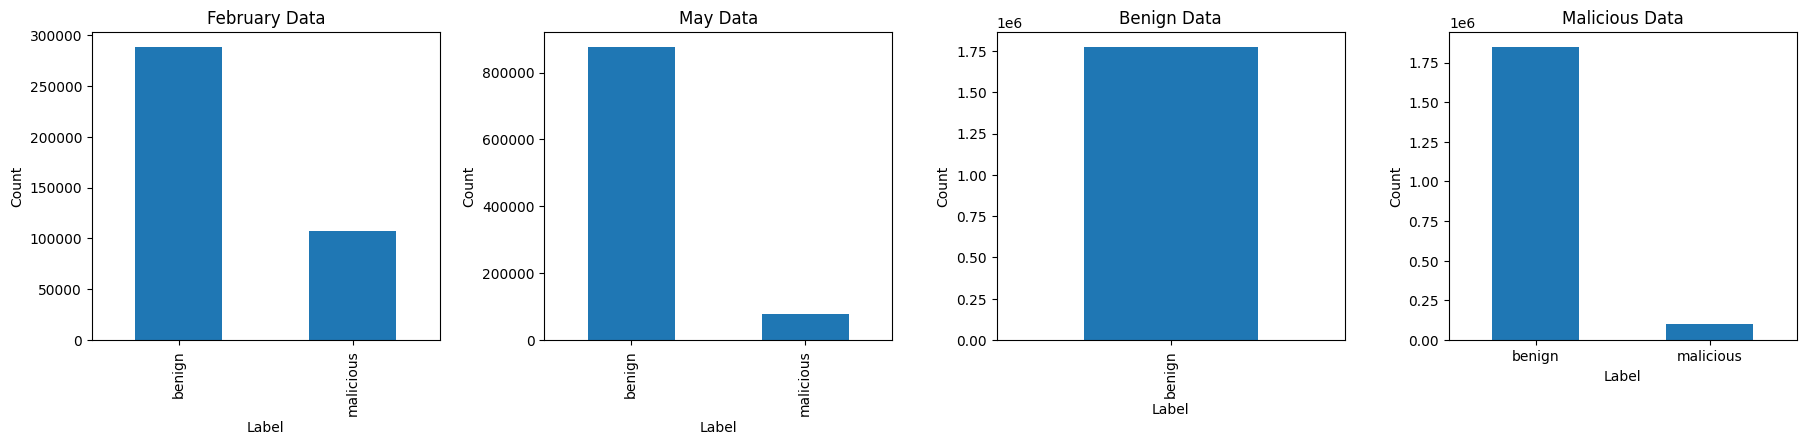

In [10]:

# Create a figure with one subplot
fig, axes = plt.subplots(1, 4, figsize=(22, 4))

for i, (value_counts, title) in enumerate(zip(
        [value_counts_february, value_counts_may, value_counts_benign, value_counts_malicious],
        ['February Data', 'May Data', 'Benign Data', 'Malicious Data'])):

    value_counts.plot(kind='bar', ax=axes[i])

    # Calculate percentages
    # total_samples = len(df_may)
    # percentages = (value_counts / total_samples) * 100

    # # Add percentages as text on top of the bars
    # for i, count in enumerate(value_counts):
    #     axes[i].text(i, count, f'{count} ({percentages[i]:.2f}%)', ha='center', va='bottom')

    # Customize the plot
    axes[i].set_title(title)
    axes[i].set_xlabel('Label')
    axes[i].set_ylabel('Count')
    plt.xticks(rotation=0)

# Adjust the subplots' positions for better readability
plt.subplots_adjust(wspace=0.3)

# Show the plot
plt.show()

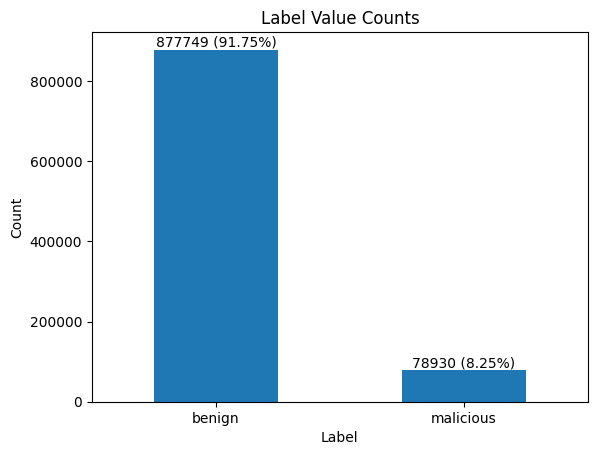

In [11]:
value_counts = df_may['label'].value_counts()

# Create a figure with one subplot
fig, ax = plt.subplots()

# Create a bar plot for the value counts
value_counts.plot(kind='bar', ax=ax)

# Calculate percentages
total_samples = len(df_may)
percentages = (value_counts / total_samples) * 100

# Add percentages as text on top of the bars
for i, count in enumerate(value_counts):
    ax.text(i, count, f'{count} ({percentages[i]:.2f}%)', ha='center', va='bottom')

# Customize the plot
ax.set_title('Label Value Counts')
ax.set_xlabel('Label')
ax.set_ylabel('Count')
plt.xticks(rotation=0)

# Show the plot
plt.show()

We can observe that the rows with benign label are much more compared to the malicius, meaning the dataset is highly disbalanced. To fix that we create two dataset with undersampled and oversampled data.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

## Merging datasets

In [13]:
df = pd.concat([df_february, df_may, df_benign, df_malicious], ignore_index=True, join="inner")
print(df.shape)
df.head(3)

(5082019, 11)


,_source_flow_id,_source_flow_final,_source_source_ip,_source_destination_ip,_source_network_bytes,_source_network_transport,_source_@timestamp,_source_event_duration,_source_destination_port,_source_source_port,label
0,EAT/////AP//////CP8AAAHAqFSDwKj3AAEIbQI,False,190.215.171.30,190.215.9.27,30684984.0,tcp,2022-02-25T12:20:00.007Z,41662926223,621.0,2049.0,benign
1,EAT/////AP//////CP8AAAHAqFSPwKj3D8CeVCQ,False,190.215.171.17,190.215.9.16,220136.0,tcp,2022-02-25T12:20:00.007Z,41154340691,9300.0,40640.0,benign
2,EAT/////AP//////CP8AAAEKapNUwKj3DvAjvpo,False,190.215.9.17,53.181.234.140,73242.0,tcp,2022-02-25T12:20:00.007Z,41259502779,9200.0,39614.0,benign


In [14]:
df.isnull().sum()[df.isnull().sum() > 0]

Series([], dtype: int64)

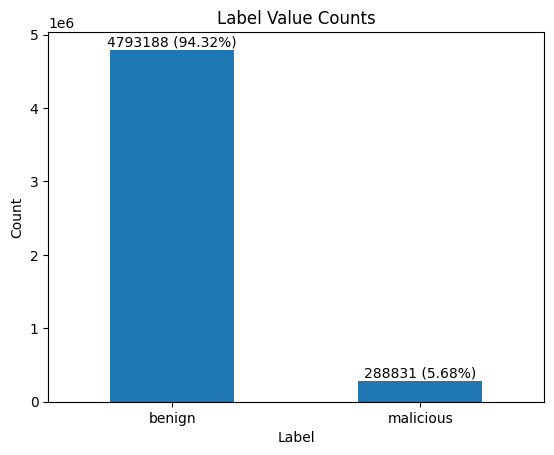

In [15]:
value_counts = df['label'].value_counts()

fig, ax = plt.subplots()

value_counts.plot(kind='bar', ax=ax)

total_samples = len(df)
percentages = (value_counts / total_samples) * 100

for i, count in enumerate(value_counts):
    ax.text(i, count, f'{count} ({percentages[i]:.2f}%)', ha='center', va='bottom')

ax.set_title('Label Value Counts')
ax.set_xlabel('Label')
ax.set_ylabel('Count')
plt.xticks(rotation=0)

plt.show()

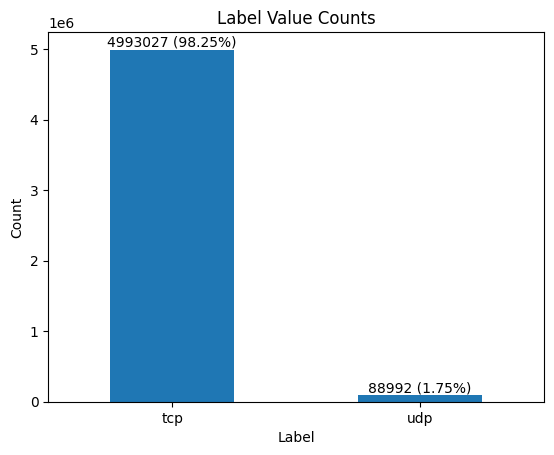

In [16]:
value_counts = df['_source_network_transport'].value_counts()

fig, ax = plt.subplots()

value_counts.plot(kind='bar', ax=ax)

total_samples = len(df)
percentages = (value_counts / total_samples) * 100

for i, count in enumerate(value_counts):
    ax.text(i, count, f'{count} ({percentages[i]:.2f}%)', ha='center', va='bottom')

ax.set_title('Label Value Counts')
ax.set_xlabel('Label')
ax.set_ylabel('Count')
plt.xticks(rotation=0)

plt.show()

## One Hot Encoding

In [17]:
df = pd.get_dummies(df, columns=['_source_network_transport'])
df['label'] = df['label'].map({'benign': 0, 'malicious': -1})
df.head(3)

,_source_flow_id,_source_flow_final,_source_source_ip,_source_destination_ip,_source_network_bytes,_source_@timestamp,_source_event_duration,_source_destination_port,_source_source_port,label,_source_network_transport_tcp,_source_network_transport_udp
0,EAT/////AP//////CP8AAAHAqFSDwKj3AAEIbQI,False,190.215.171.30,190.215.9.27,30684984.0,2022-02-25T12:20:00.007Z,41662926223,621.0,2049.0,0,1,0
1,EAT/////AP//////CP8AAAHAqFSPwKj3D8CeVCQ,False,190.215.171.17,190.215.9.16,220136.0,2022-02-25T12:20:00.007Z,41154340691,9300.0,40640.0,0,1,0
2,EAT/////AP//////CP8AAAEKapNUwKj3DvAjvpo,False,190.215.9.17,53.181.234.140,73242.0,2022-02-25T12:20:00.007Z,41259502779,9200.0,39614.0,0,1,0


In [18]:
df[df['_source_flow_id'] == 'EAT/////AP//////CP8AAAHAqFSAwKj3Dskd4RU']

,_source_flow_id,_source_flow_final,_source_source_ip,_source_destination_ip,_source_network_bytes,_source_@timestamp,_source_event_duration,_source_destination_port,_source_source_port,label,_source_network_transport_tcp,_source_network_transport_udp
146,EAT/////AP//////CP8AAAHAqFSAwKj3Dskd4RU,False,190.215.171.28,190.215.9.17,408.0,2022-02-25T12:20:00.092Z,30066825097,5601.0,7625.0,0,1,0
452,EAT/////AP//////CP8AAAHAqFSAwKj3Dskd4RU,False,190.215.171.28,190.215.9.17,544.0,2022-02-25T12:20:00.007Z,14839076349,5601.0,7625.0,0,1,0
708,EAT/////AP//////CP8AAAHAqFSAwKj3Dskd4RU,False,190.215.171.28,190.215.9.17,408.0,2022-02-25T12:19:50.002Z,30066825097,5601.0,7625.0,0,1,0
960,EAT/////AP//////CP8AAAHAqFSAwKj3Dskd4RU,False,190.215.171.28,190.215.9.17,544.0,2022-02-25T12:19:50.007Z,14839076349,5601.0,7625.0,0,1,0
1135,EAT/////AP//////CP8AAAHAqFSAwKj3Dskd4RU,True,190.215.171.28,190.215.9.17,840.0,2022-02-25T12:20:40.092Z,45206860361,5601.0,7625.0,0,1,0
1342,EAT/////AP//////CP8AAAHAqFSAwKj3Dskd4RU,False,190.215.171.28,190.215.9.17,1408.0,2022-02-25T12:20:40.107Z,29712554471,5601.0,7625.0,0,1,0
1556,EAT/////AP//////CP8AAAHAqFSAwKj3Dskd4RU,False,190.215.171.28,190.215.9.17,272.0,2022-02-25T12:19:40.002Z,14998853348,5601.0,7625.0,0,1,0
1859,EAT/////AP//////CP8AAAHAqFSAwKj3Dskd4RU,False,190.215.171.28,190.215.9.17,272.0,2022-02-25T12:19:40.108Z,57160,5601.0,7625.0,0,1,0
2021,EAT/////AP//////CP8AAAHAqFSAwKj3Dskd4RU,False,190.215.171.28,190.215.9.17,840.0,2022-02-25T12:20:30.002Z,45206860361,5601.0,7625.0,0,1,0
2262,EAT/////AP//////CP8AAAHAqFSAwKj3Dskd4RU,False,190.215.171.28,190.215.9.17,1408.0,2022-02-25T12:20:30.000Z,29712554471,5601.0,7625.0,0,1,0


In [19]:
# Filter rows where '_source_flow_final' is True
filtered_df = df[df['_source_flow_final']]

# Group by '_source_flow_id' and aggregate columns
result_df = filtered_df.groupby('_source_flow_id', as_index=False).agg({
    '_source_flow_final': 'first',
    '_source_source_ip': 'first',
    '_source_destination_ip': 'first',
    '_source_network_bytes': 'sum',
    '_source_@timestamp': 'first',
    '_source_event_duration': 'sum',
    '_source_destination_port': 'first',
    '_source_source_port': 'first',
    'label': 'first',
    '_source_network_transport_tcp': 'first',
    '_source_network_transport_udp': 'first'
})

print(result_df.shape)
result_df.head(3)

(236302, 12)


,_source_flow_id,_source_flow_final,_source_source_ip,_source_destination_ip,_source_network_bytes,_source_@timestamp,_source_event_duration,_source_destination_port,_source_source_port,label,_source_network_transport_tcp,_source_network_transport_udp
0,EAL/////AP////8I//8AAAEAAAAA/////0QAQwA,True,63.255.48.24,143.113.254.192,338.0,2021-05-23T15:38:48.533Z,0,67.0,68.0,0,0,1
1,EAL/////AP////8I//8AAAEKAAICCgACD0MARAA,True,53.255.61.238,53.255.61.226,4288.0,2021-05-21T01:25:20.195Z,92358,67.0,68.0,0,0,1
2,EAL/////AP////8I//8AAAEKAAIDCgACDzUA+dU,True,244.121.253.144,244.121.253.156,186.0,2022-05-04T16:41:10.325Z,440771,53.0,54777.0,0,0,1


<ipython-input-24-c89d34b4f3f3>:10: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, (label, count) in enumerate(value_counts.iteritems()):


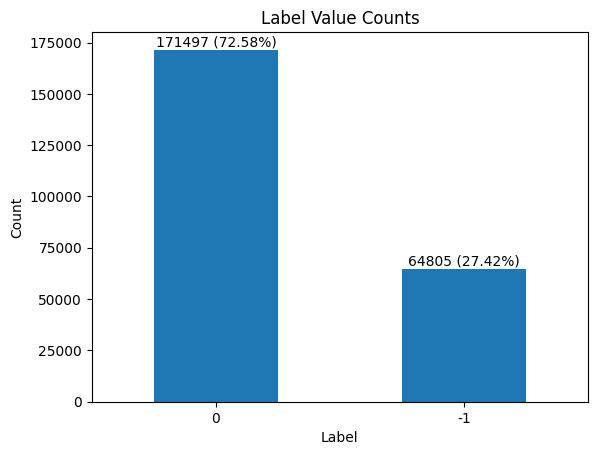

In [24]:

value_counts = result_df['label'].value_counts()

fig, ax = plt.subplots()

value_counts.plot(kind='bar', ax=ax)

total_samples = len(result_df)
percentages = (value_counts / total_samples) * 100

for i, (label, count) in enumerate(value_counts.iteritems()):
    ax.text(i, count, f'{count} ({percentages[label]:.2f}%)', ha='center', va='bottom')

ax.set_title('Label Value Counts')
ax.set_xlabel('Label')
ax.set_ylabel('Count')
plt.xticks(rotation=0)

plt.show()

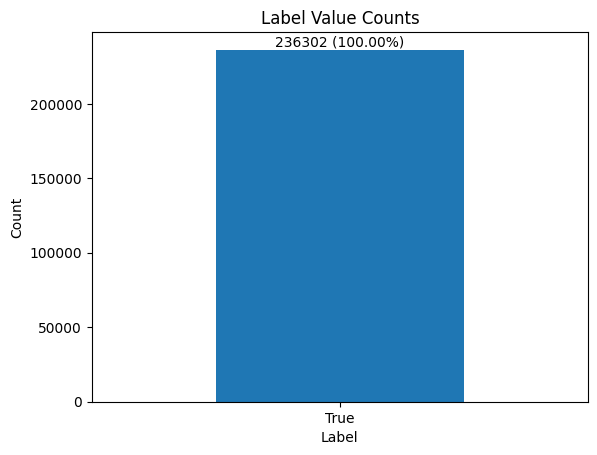

In [25]:
value_counts = result_df['_source_flow_final'].value_counts()

fig, ax = plt.subplots()

value_counts.plot(kind='bar', ax=ax)

total_samples = len(result_df)
percentages = (value_counts / total_samples) * 100

for i, count in enumerate(value_counts):
    ax.text(i, count, f'{count} ({percentages[i]:.2f}%)', ha='center', va='bottom')

ax.set_title('Label Value Counts')
ax.set_xlabel('Label')
ax.set_ylabel('Count')
plt.xticks(rotation=0)

plt.show()

In [26]:
result_df = result_df.drop('_source_flow_final', axis=1)

In [27]:
print(result_df.shape)
result_df.head(3)

(236302, 11)


,_source_flow_id,_source_source_ip,_source_destination_ip,_source_network_bytes,_source_@timestamp,_source_event_duration,_source_destination_port,_source_source_port,label,_source_network_transport_tcp,_source_network_transport_udp
0,EAL/////AP////8I//8AAAEAAAAA/////0QAQwA,63.255.48.24,143.113.254.192,338.0,2021-05-23T15:38:48.533Z,0,67.0,68.0,0,0,1
1,EAL/////AP////8I//8AAAEKAAICCgACD0MARAA,53.255.61.238,53.255.61.226,4288.0,2021-05-21T01:25:20.195Z,92358,67.0,68.0,0,0,1
2,EAL/////AP////8I//8AAAEKAAIDCgACDzUA+dU,244.121.253.144,244.121.253.156,186.0,2022-05-04T16:41:10.325Z,440771,53.0,54777.0,0,0,1


In [ ]:
result_df.to_csv('merged.csv', index=False)

In [ ]:
# Load the notebook
with open("/content/drive/MyDrive/Fontys/SUE/datapreprocessing.ipynb", "r", encoding="utf-8") as f:
    notebook = nbformat.read(f, as_version=4)

# Convert to HTML
html_exporter = HTMLExporter()
html_data, _ = html_exporter.from_notebook_node(notebook)

# Save the HTML data to a file
with open("/content/drive/MyDrive/Fontys/SUE/datapreprocessing.html", "w", encoding="utf-8") as f:
    f.write(html_data)